# Python Interactive Notebook Comparisons

<b> Testing: </b>
    <li> Matplotlib </li>
    <li> MPLD3 </li>
    <li> Plotly </li>

## Matplotlib

<b> Pros: </b>
<li> Simplcity: 1-line addition to enable existing matplotlib images </li>

<b> Cons: </b>
<li> Requires kernel running </li>
<li> Hover, pop-up interaction not straightforward </li>

In [13]:
import pysal as ps  # 1.5 or higher
import numpy as np  # 1.7 or higher
import pandas as pd # 0.10 or higher
import matplotlib 
import matplotlib.pyplot as plt
import random as rdm
from pylab import *
from pysal.contrib.viz import mapping as maps
%matplotlib notebook
#%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<IPython.core.display.Javascript object>


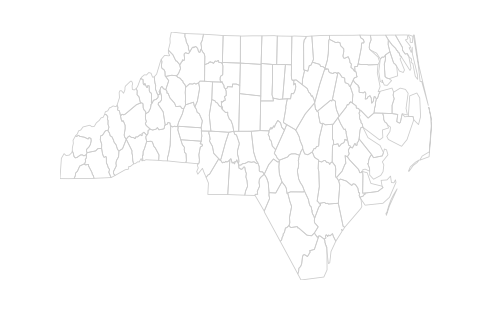

Reading from  /Users/Masia/anaconda/lib/python2.7/site-packages/pysal/examples/sids2/sids2.shp


In [14]:
shp_link = ps.examples.get_path('sids2.shp')
data = ps.open(shp_link)

fig = figure()

base = maps.map_poly_shp(data)
base.set_facecolor('none')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')

ax = maps.setup_ax([base], [data.bbox, data.bbox, data.bbox])
fig.add_axes(ax)
show()

print 'Reading from ', shp_link

In [92]:
# Calculate a spatial weight for our observations.
f = ps.open(ps.examples.get_path("sids2.dbf"))
b = np.array(f.by_col('BIR79'))
e = np.array(f.by_col('SID79'))
w = ps.open(ps.examples.get_path("sids2.gal")).read()
print w

In [93]:
# Calculate the Moran's I, & plot spatial lag versus our variable of interest.
mi = ps.esda.moran.Moran_Rate(e, b, w, two_tailed=False)
"%6.4f" % mi.I
"%6.4f" % mi.EI
"%6.4f" % mi.p_norm

mir=ps.Moran(e,w,permutations=9999)
mir.p_sim

0.0071000000000000004

In [94]:
#Calculate the spatial lag for the SIDS79 variable
w_sids79 = ps.lag_spatial(w, e)

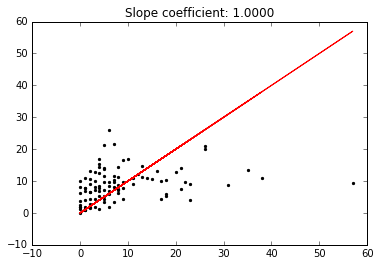

In [95]:
#Show a Moran scatterplot of SIDS79 and its Spatial Lag
scatter(e, w_sids79, marker='.', s=20, alpha=1, color='k')
fit = ps.spreg.OLS(e[:, None], e[:, None])
plot(e[:, None], fit.predy, color='r')
title("Slope coefficient: %.4f"%fit.betas[1])

In [96]:
# Calculate a LISA statistic
lisa_SIDS79 = ps.Moran_Local(e, w, permutations=9999)

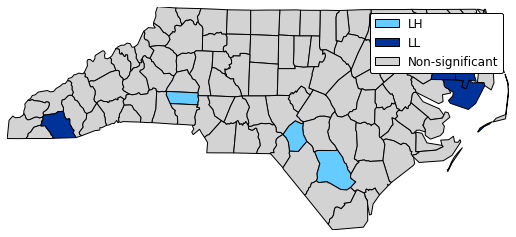

In [97]:
# Show LISA clusters
shp_link = ps.examples.get_path("sids2.shp")
lisamap_SIDS79 = maps.plot_lisa_cluster(shp_link, lisa, figsize=(9, 4))

## Matplotlib Notebook Exploration

In [ ]:
%matplotlib notebook

<IPython.core.display.Javascript object>


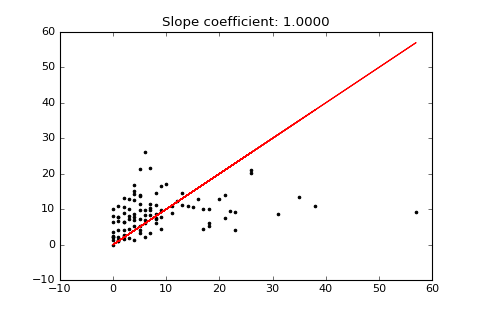

In [100]:
#Show a Moran scatterplot of SIDS79 and its Spatial Lag
scatter(e, w_sids79, marker='.', s=20, alpha=1, color='k')
fit = ps.spreg.OLS(e[:, None], e[:, None])
plot(e[:, None], fit.predy, color='r')
title("Slope coefficient: %.4f"%fit.betas[1])